In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 450kB 55.1MB/s 
     |████████████████████████████████| 3.8MB 51.3MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [0]:
# Other Imports
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 # uniform distribution between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # this implements the function y = cos(2xi) + cos(3x2)

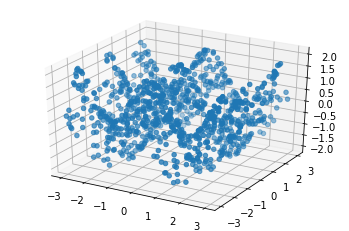

In [4]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
# plt.show()

In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,),activation='relu'),
  tf.keras.layers.Dense(1)
])

In [6]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss='mse')
r = model.fit(X,Y,epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 623us/sample - loss: 1.0105
Epoch 2/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.9319
Epoch 3/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.8989
Epoch 4/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8908
Epoch 5/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.8361
Epoch 6/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.7950
Epoch 7/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7275
Epoch 8/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.6782
Epoch 9/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.6437
Epoch 10/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.5769
Epoch 11/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5321
Epoch 12/100
1000/

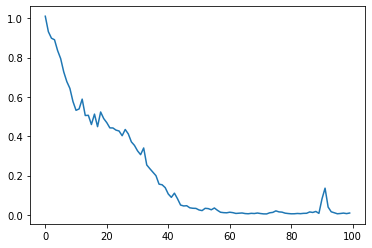

In [7]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')

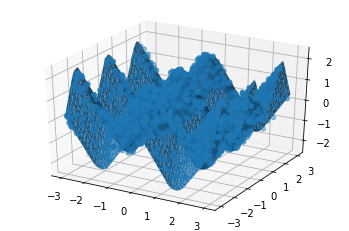

In [9]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
# surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
# plt.show()

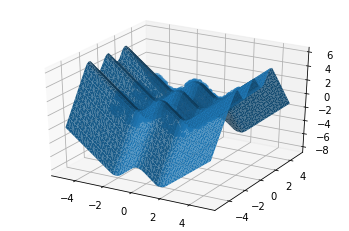

In [10]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
# surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
# plt.show()